# Data Visualization 
# IMDb Exploratory Data Analysis
Install Necessary Libraries

In [152]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#display wide tables 
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

We have a list of 10,000 movies with IMDB user rating as imdb.txt. We want to perform a exploratory data analysis of this data in Python by using its Pandas library.  We will perform the cleaning, transformation and then visualization on the raw data. This will help us to understand the data for further processing.

In [153]:
#!head imdb.txt
# read in the data
movies = pd.read_csv('imdb.txt', delimiter='\t')
movies.columns = ['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres']
movies.head()

,imdbID,title,year,score,votes,runtime,genres
0,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
1,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
2,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
3,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller
4,tt0109830,Forrest Gump (1994),1994,8.7,368994,142 mins.,Comedy|Drama|Romance


## 1. Loading data

Read the imdb.txt into dataframe named data. The data is tab delimited. The columns names are 'imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres'

In [154]:
# Your code here
movies.head()

,imdbID,title,year,score,votes,runtime,genres
0,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
1,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
2,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
3,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller
4,tt0109830,Forrest Gump (1994),1994,8.7,368994,142 mins.,Comedy|Drama|Romance


Check the data types of each column

In [155]:
# Your code here
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   imdbID   9999 non-null   object 
 1   title    9999 non-null   object 
 2   year     9999 non-null   int64  
 3   score    9999 non-null   float64
 4   votes    9999 non-null   int64  
 5   runtime  9999 non-null   object 
 6   genres   9998 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 546.9+ KB


convert the string '142min' to number 142

In [156]:
# Your code here
movies['runtime'] = pd.to_numeric(movies['runtime'].str.replace(' mins.', ''))
movies['runtime'].head()

C:\Users\ST\AppData\Local\Temp\ipykernel_12884\1881690563.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  movies['runtime'] = pd.to_numeric(movies['runtime'].str.replace(' mins.', ''))


0    154
1    139
2    136
3    148
4    142
Name: runtime, dtype: int64

Perform this conversion on every element in the dataframe `data`

In [157]:
# perform this conversion on every element in the dataframe `movies'

# Your code here
movies['score'] = pd.to_numeric(movies['score'])
movies['votes'] = pd.to_numeric(movies['votes'])
movies['year'] = pd.to_numeric(movies['year'])
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   imdbID   9999 non-null   object 
 1   title    9999 non-null   object 
 2   year     9999 non-null   int64  
 3   score    9999 non-null   float64
 4   votes    9999 non-null   int64  
 5   runtime  9999 non-null   int64  
 6   genres   9998 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 546.9+ KB


### Split the genres

We would like to split the genres column into many columns. Each new column will correspond to a single genre, and each cell will be True or False.

First, we would like to find the all the unique genres present in any record. Its better to sort the genres to locate easily.

In [158]:
# determine the unique genres

all_genres = movies['genres'].str.split('|').explode()
unique_genres = all_genres.unique()
unique_genres

array(['Crime', 'Thriller', 'Drama', 'Mystery', 'Action', 'Adventure',
       'Sci-Fi', 'Comedy', 'Romance', 'Fantasy', 'Biography', 'History',
       'War', 'Family', 'Animation', 'Musical', 'Horror', 'Western',
       'Sport', 'Music', 'Film-Noir', 'Adult', nan, 'News', 'Reality-TV'],
      dtype=object)

Then make a column for each genre

In [159]:
# make a column for each genre
# Your code here
genre_dummies = movies['genres'].str.get_dummies()
genre_dummies.head()

# concatenate the original dataframe with the new `genre_dummies` dataframe
movies = pd.concat([movies, genre_dummies], axis=1)
movies.head()

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154,Crime|Thriller,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,tt0137523,Fight Club (1999),1999,8.8,458173,139,Drama|Mystery|Thriller,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,tt0133093,The Matrix (1999),1999,8.7,448114,136,Action|Adventure|Sci-Fi,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,tt1375666,Inception (2010),2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,tt0109830,Forrest Gump (1994),1994,8.7,368994,142,Comedy|Drama|Romance,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Eliminate year from the title
We can fix each element by stripping off the last 7 characters

In [160]:
# Strip off last 7 character from title
# Your code here
movies['title'] = movies['title'].str.strip().str[:-7]
movies.head()

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0110912,Pulp Fiction,1994,9.0,490065,154,Crime|Thriller,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,tt0137523,Fight Club,1999,8.8,458173,139,Drama|Mystery|Thriller,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,tt0133093,The Matrix,1999,8.7,448114,136,Action|Adventure|Sci-Fi,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,tt1375666,Inception,2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,tt0109830,Forrest Gump,1994,8.7,368994,142,Comedy|Drama|Romance,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## 3. Descriptive Statistics

Next, we would like to discover outliers. One possible way is to describe some basic, global summaries of the DataFrame on `score`, `runtime`, `year`, `votes`.

In [176]:
# Call `describe` on relevant columns
# Next, we would like to discover outliers. One possible way is to describe some basic, global summaries of the DataFrame on `score`, `runtime`, `year`, `votes`.
# Your code here
movies[['score', 'runtime', 'year', 'votes']].describe()

,score,runtime,year,votes
count,9999.000000,9717.000000,9999.000000,9992.000000
mean,6.385789,106.580426,1993.472747,16224.472778
std,1.189660,20.228436,14.830665,31821.041620
min,1.500000,45.000000,1950.000000,1356.000000
25%,5.700000,93.000000,1986.000000,2330.750000
50%,6.600000,103.000000,1998.000000,4977.000000
75%,7.200000,115.000000,2005.000000,15231.000000
max,9.200000,450.000000,2011.000000,385149.000000


Do you see any quantity unusual. Better replace with NAN.

In [175]:
# Do you see any quantity unusual. Better replace with NAN.
# Your code here
movies.loc[movies['score'] > 10, 'score'] = np.nan
movies.loc[movies['runtime'] < 30, 'runtime'] = np.nan
movies.loc[(movies['votes'] < 5) | (movies['votes'] > 400000), 'votes'] = np.nan
movies.loc[(movies['year'] < 1920) | (movies['year'] > 2018), 'year'] = np.nan
movies[['score', 'runtime', 'year', 'votes']].describe()


,score,runtime,year,votes
count,9999.000000,9717.000000,9999.000000,9992.000000
mean,6.385789,106.580426,1993.472747,16224.472778
std,1.189660,20.228436,14.830665,31821.041620
min,1.500000,45.000000,1950.000000,1356.000000
25%,5.700000,93.000000,1986.000000,2330.750000
50%,6.600000,103.000000,1998.000000,4977.000000
75%,7.200000,115.000000,2005.000000,15231.000000
max,9.200000,450.000000,2011.000000,385149.000000


Lets repeat describe to make sure that it is fine

In [163]:
# Lets repeat describe to make sure that it is fine
# Your code here
movies.describe()


,year,score,votes,runtime,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
count,9999.000000,9999.000000,9992.000000,9717.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,1993.472747,6.385789,16224.472778,106.580426,0.189119,0.000900,0.131313,0.031403,0.039404,0.392239,0.186619,0.569657,0.075408,0.091609,0.004000,0.035804,0.121512,0.037104,0.026003,0.100910,0.000100,0.000100,0.244124,0.089709,0.028803,0.283228,0.051205,0.023502
std,14.830665,1.189660,31821.041620,20.228436,0.391623,0.029989,0.337759,0.174413,0.194564,0.488274,0.389625,0.495149,0.264061,0.288488,0.063125,0.185809,0.326738,0.189025,0.159151,0.301225,0.010001,0.010001,0.429588,0.285779,0.167260,0.450589,0.220427,0.151500
min,1950.000000,1.500000,1356.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1986.000000,5.700000,2330.750000,93.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1998.000000,6.600000,4977.000000,103.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2005.000000,7.200000,15231.000000,115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2011.000000,9.200000,385149.000000,450.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Basic plots

Lets draw histograms for release year, IMDB rating, runtime distribution

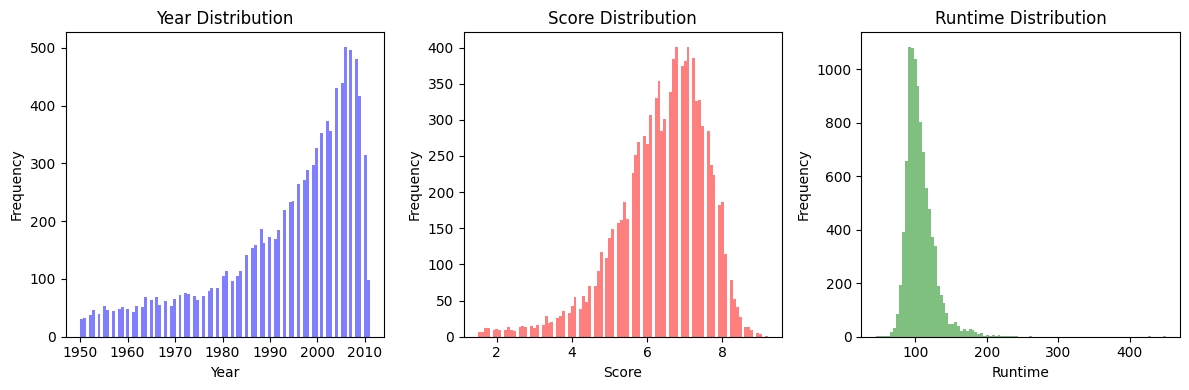

In [164]:
# Lets draw histograms for release year, IMDB rating, runtime distribution
# Your code here
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax0, ax1, ax2 = axes.flatten()

ax0.hist(movies['year'].dropna(), bins=100, alpha=0.5, color='b')
ax0.set_xlabel('Year')
ax0.set_ylabel('Frequency')
ax0.set_title('Year Distribution')

ax1.hist(movies['score'].dropna(), bins=100, alpha=0.5, color='r')
ax1.set_xlabel('Score')
ax1.set_ylabel('Frequency')
ax1.set_title('Score Distribution')

ax2.hist(movies['runtime'].dropna(), bins=100, alpha=0.5, color='g')
ax2.set_xlabel('Runtime')
ax2.set_ylabel('Frequency')
ax2.set_title('Runtime Distribution')

fig.tight_layout()
plt.show()


Scatter plot between IMDB rating and years. Does it shows some trend?

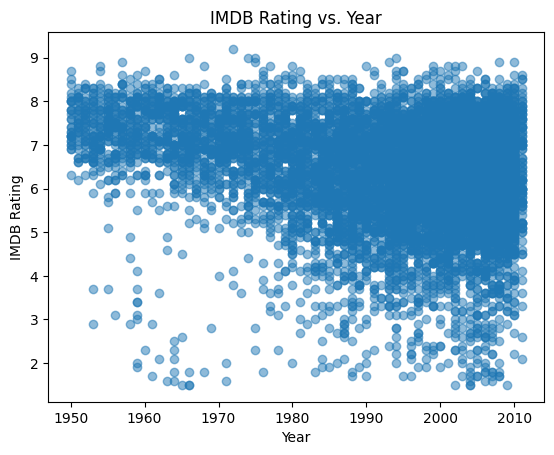

In [165]:
# Scatter plot between IMDB rating and years. Does it shows some trend?
# Your code here
plt.scatter(movies['year'], movies['score'], alpha=0.5)
plt.title('IMDB Rating vs. Year')
plt.xlabel('Year')
plt.ylabel('IMDB Rating')
plt.show()

Is there any relationship between IMDB rating and number of votes? Describe

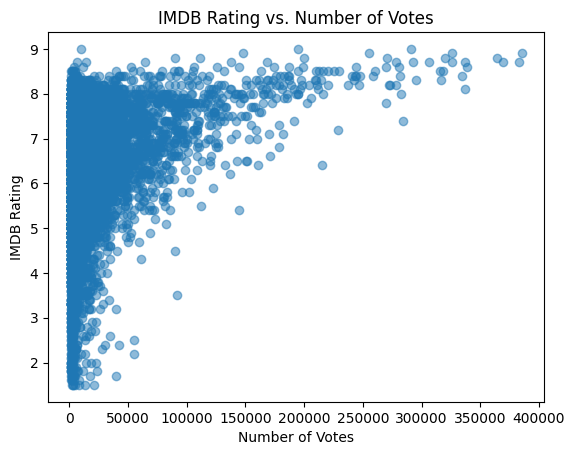

In [166]:
# Is there any relationship between IMDB rating and number of votes? Describe
# Your code here
plt.scatter(movies['votes'], movies['score'], alpha=0.5)
plt.title('IMDB Rating vs. Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('IMDB Rating')
plt.show()

### Data aggregation/Summarization

*What genres are the most frequent?* Lay down the genres in descending order of count

In [167]:
# sums over rows by default
# What genres are the most frequent? Lay down the genres in descending order of count.
# Your code here
genre_counts = genre_dummies.sum().sort_values(ascending=False)
genre_counts

Drama         5696
Comedy        3922
Thriller      2832
Romance       2441
Action        1891
Crime         1866
Adventure     1313
Horror        1215
Mystery       1009
Fantasy        916
Sci-Fi         897
Family         754
War            512
Biography      394
Music          371
History        358
Animation      314
Sport          288
Musical        260
Western        235
Film-Noir       40
Adult            9
News             1
Reality-TV       1
dtype: int64

Draw a bar plot to show top ten genres

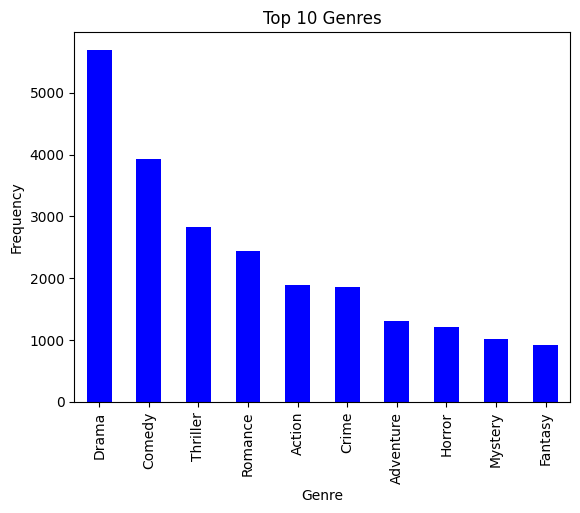

In [168]:
#Draw a bar plot to show top ten genres
#Your code here
genre_counts[:10].plot(kind='bar', color='b')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

*How many genres does a movie have, on average?*

In [169]:
#axis=1 sums over columns instead
#How many genres does a movie have, on average?*
#Your code here
genre_counts = genre_dummies.sum(axis=1)
genre_counts.mean()

2.7537753775377536

## Explore Group Properties

Let's split up movies by decade. Find the decade mean score and draw a plot as follows:

<img src=score-year-plot.png>

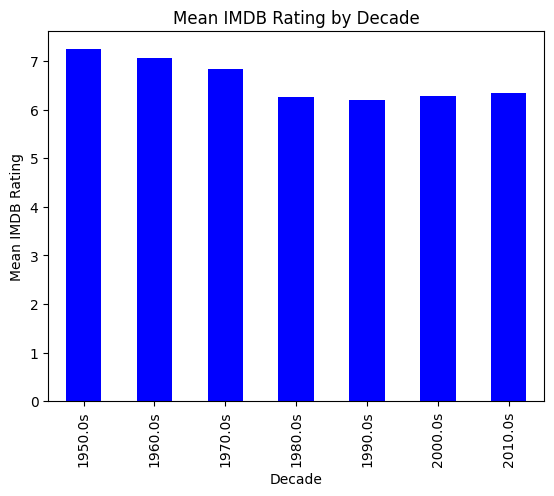

In [170]:
# Let's split up movies by decade. Find the decade mean score and draw a plot as follows:
# <img src=score-year-plot.png>
# Your code here
decade = movies['year'] // 10 * 10
decade = decade.astype(str) + 's'
decade.name = 'decade'
decade.head()
movies_decade = movies.join(decade)
movies_decade.head()
decade_mean = movies_decade.groupby('decade').score.mean()
decade_mean
decade_mean.plot(kind='bar', color='b')
plt.title('Mean IMDB Rating by Decade')
plt.xlabel('Decade')
plt.ylabel('Mean IMDB Rating')
plt.show()


Find the most popular movie each year


In [171]:
#Find the most popular movie each year
#Your code here
idx = movies.groupby('year')['votes'].transform(max) == movies['votes']
movies[idx][['year', 'title', 'votes']]

,year,title,votes
3,2010.0,Inception,385149.0
4,1994.0,Forrest Gump,368994.0
5,1999.0,American Beauty,338332.0
6,2009.0,Avatar,336855.0
7,1993.0,Schindler's List,325888.0
...,...,...,...
1031,1972.0,Deliverance,40198.0
1033,1951.0,Strangers on a Train,40104.0
1109,1953.0,Roman Holiday,36760.0
1263,1956.0,The Searchers,32502.0
